In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
# To print extended table
#pd.set_option('display.max_columns', None)  # or 1000
#pd.set_option('display.max_rows', None)  # or 1000

In [3]:
data = pd.read_csv("../datos/dataSupernova/jla_lcparams.txt", sep=" ")
data = data.sort_values("zcmb")
data

,#name,zcmb,zhel,dz,mb,dmb,x1,dx1,color,dcolor,...,d3rdvar,tmax,dtmax,cov_m_s,cov_m_c,cov_s_c,set,ra,dec,biascor
648,sn1999ac,0.010060,0.009500,0,14.148421,0.174566,0.202688,0.068440,0.048593,0.025981,...,0.128500,51250.610935,0.078970,0.000244,0.000652,-0.000154,3,241.812542,7.972333,-0.008427
691,sn2004s,0.010291,0.009370,0,14.157498,0.173593,-0.117402,0.082511,0.022258,0.024846,...,0.280891,53040.308109,0.290845,-0.000483,0.000665,-0.000348,3,101.431250,-31.231250,-0.008430
641,sn1997do,0.010550,0.010120,0,14.449314,0.173090,0.791332,0.187870,0.118415,0.030547,...,0.280891,50766.597803,0.115604,0.003521,0.000989,0.001322,3,111.677083,47.093333,-0.008434
673,sn2002dp,0.010888,0.011638,0,14.557203,0.169021,-0.316464,0.184325,0.054095,0.023005,...,0.363500,52451.216137,0.133147,0.001596,0.000487,0.001020,3,352.125430,22.427240,-0.008440
713,sn2006bh,0.011184,0.010900,0,14.342973,0.166533,-1.648794,0.032216,-0.083155,0.019407,...,0.352000,53833.523740,0.039787,-0.000039,0.000286,-0.000115,3,340.067078,-66.485085,-0.008446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,06D3en,1.060801,1.060000,0,24.707870,0.132013,-0.952679,0.412773,-0.158207,0.061030,...,0.935000,53881.407872,0.949506,0.010444,-0.003050,0.004456,1,215.305567,52.456079,-0.036389
242,Gabi,1.120850,1.120000,0,25.147113,0.121686,0.620453,0.307485,-0.075491,0.053200,...,0.296000,53488.738514,0.524573,0.004032,0.000388,0.005988,4,189.057630,62.202100,0.000000
243,Lancaster,1.230892,1.230000,0,26.046776,0.128558,-0.077374,0.690464,0.087011,0.048271,...,0.194500,53431.841687,1.597837,0.003542,0.000211,0.008241,4,189.236330,62.214814,0.000000
614,Torngasek,1.265901,1.265000,0,25.735598,0.128614,0.286816,0.559546,0.021062,0.047718,...,0.391000,52693.622067,1.790259,-0.003817,-0.000169,0.003064,4,189.331960,62.310417,0.000000


In [4]:
mb = data["mb"]
X1 = data["x1"]
C = data["color"]

In [5]:
def calc_mu(alpha, beta, Mb):
    mu_aux = []
    for index in data.index:
        mu_aux.append(mb[index] - (Mb - alpha * X1[index] + beta * C[index]))
    return mu_aux

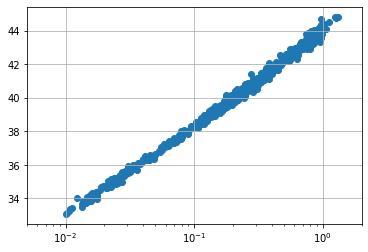

In [6]:
plt.scatter(data["zcmb"], calc_mu(alpha = 0.141, beta = 3.01, Mb = -19.05))
plt.xscale('log')
plt.xlim(0.005, 2)
plt.grid()
d=1

In [7]:
import cosmolopy.distance as cd

In [8]:
zcmb = data["zcmb"]

In [9]:
def mu_teo(omega):
    cosmo = {'omega_M_0':omega, 'omega_lambda_0':1-omega, 'omega_k_0':0.0, 'h':0.7}
    lumdits = 5 * np.log10(cd.luminosity_distance(zcmb,**cosmo)*1e6/10)
    return lumdits

NameError: name 'lumdits' is not defined

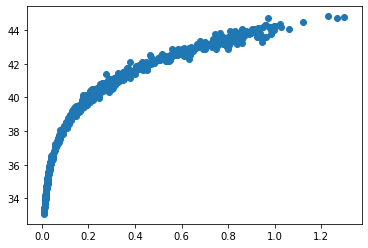

In [10]:
plt.scatter(zcmb, calc_mu(alpha = 0.141, beta = 3.01, Mb = -19.05))
plt.scatter(zcmb, lumdits)
plt.xscale('log')
plt.xlim(0.005, 2)
plt.grid()

In [17]:
mat0 = pd.read_csv("../datos/dataSupernova/jla_v0_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mat1 = pd.read_csv("../datos/dataSupernova/jla_v0a_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mat2 = pd.read_csv("../datos/dataSupernova/jla_v0b_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mat3 = pd.read_csv("../datos/dataSupernova/jla_va_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mat4 = pd.read_csv("../datos/dataSupernova/jla_vab_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)
mat5 = pd.read_csv("../datos/dataSupernova/jla_vb_covmatrix.dat", sep=" ").to_numpy().reshape(740, 740)

In [18]:
covarianceMatrix = mat0 + mat1 + mat2 + mat3 + mat4 + mat5

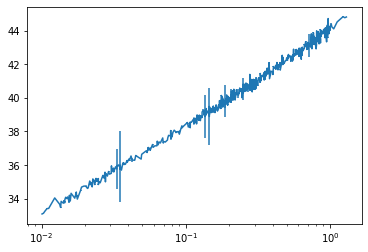

In [19]:
plt.errorbar(zcmb, calc_mu(alpha = 0.141, beta = 3.01, Mb = -19.05), yerr = np.diag(covarianceMatrix))
plt.xscale('log')

## Nueva función Chi Square

In [20]:
covariance_inverse = covarianceMatrix

In [21]:
# params[0] = alpha, params[1] = beta, params[2] = M, params[3] = omega
def newChi(params):
    mu_obs = calc_mu(alpha = params[0], beta = params[1], Mb = params[2])
    resta = (mu_obs - mu_teo(params[3]))
    
    aux = np.sum(np.matmul(resta.T, covariance_inverse) * resta)
    return aux

In [22]:
newChi([0.1, 3, -19, 0.5])

2.3498300052847534

In [23]:
# omega va de 0 a 1

## Aplicando optimize

In [24]:
optimization = minimize(newChi, [0.1,3,-19,0.5])
optimization

      fun: 0.30961786206122016
 hess_inv: array([[ 4.49432201e-02, -4.11035938e-01, -7.58657824e-03,
         6.45243246e-05],
       [-4.11035938e-01,  1.65610322e+01,  1.01715541e-02,
        -7.06981128e-01],
       [-7.58657824e-03,  1.01715541e-02,  6.59535776e-03,
         1.25956685e-02],
       [ 6.45243246e-05, -7.06981128e-01,  1.25956685e-02,
         5.73176056e-02]])
      jac: array([-1.52736902e-07,  4.28408384e-07,  7.89761543e-06, -4.51132655e-06])
  message: 'Optimization terminated successfully.'
     nfev: 114
      nit: 16
     njev: 19
   status: 0
  success: True
        x: array([  0.13720092,   1.13194288, -19.11066529,   0.32253757])